In [50]:
import networkx as nx
import matplotlib.pyplot as plt

## Графы

### 1. Поиск компонент связности

* Необходимо последовательно запускать
dfs от каждой не посещенной вершины.
* Заводим массив visited для отслеживания
посещения вершин
* Если после запуска dfs в графе есть
вершины, которых нет в массиве visited,
то запускаем от любой такой вершины
обход в глубину
* После каждого запуска dfs
инкрементируем счетчик количества
компонент связности.

In [51]:
def find_connected_components(graph):
    visited = {key: False for key in graph}  # Словарь для отслеживания посещенных вершин
    connected_components = []  # Список для хранения связных компонентов

    for i in graph:
        if not visited[i]:  
            component = []  # Список для хранения текущей компоненты
            dfs(graph, i, visited, component)  # Выполнение поиска в глубину
            connected_components.append(component)  # Добавление компоненты в список
    return connected_components

def dfs(graph, v, visited, component):
    visited[v] = True  # Отметка вершины как посещенной
    component.append(v)  
    # Рекурсивный вызов функции для всех соседей текущей вершины
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited, component)

In [52]:
graph = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2],
    4: [6, 7],
    5: [6, 7],
    6: [4, 5, 7],
    7: [4, 5, 6],
    8: [11],
    9: [10, 11],
    10: [9],
    11: [8, 9]
}

connected_components = find_connected_components(graph)
print(connected_components)

[[1, 2, 3], [4, 6, 5, 7], [8, 11, 9, 10]]


### 2. Раскраска графа

* У нас уже есть хеш мапа visited и в ней мы можем в качестве значения хранить “цвет” компоненты связности.

In [53]:
def dfs(graph, v, visited, color):
    visited[v] = color  # Пометить текущую вершину цветом компоненты
    for i in graph[v]:  
        if visited[i] == 0:  # Если вершина не посещена, рекурсивно исследовать
            dfs(graph, i, visited, color)

def find_connected_components(graph):
    visited = {node: 0 for node in graph}  # Инициализация словаря посещенных вершин
    color = 0  # Индекс компоненты связности
    for node in graph:  
        if visited[node] == 0:  # Если текущая вершина еще не посещена
            color += 1  
            dfs(graph, node, visited, color)  # Найти и пометить все вершины этой компоненты

    return visited  

In [54]:
component_map = find_connected_components(graph)
print(component_map)

{1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 8: 3, 9: 3, 10: 3, 11: 3}


### 3. Поиск цикла в графе

Дан граф в виде списка вершин. Необходимо понять, есть ли в этом графе цикл.
* DFS: Мы используем поиск в
глубину для обхода графа,
начиная с каждой вершины.
При этом помечаем вершины,
которые уже были посещены.
* Обнаружение обратных рёбер:
Если в процессе DFS соседская
вершина уже была посещена и
при этом не является
родительской для текущей
вершины - в графе есть цикл.
* Возврат результата: Если при
обходе графа находится цикл,
функция возвращает True,
иначе - False.

In [55]:
def has_cycle(graph):
    visited = set()  
    for vertex in graph:
        if vertex not in visited:
            if dfs(graph, vertex, None, visited):
                return True
    return False

def dfs(graph, vertex, parent, visited):
    visited.add(vertex)  # Добавляем вершину в множество посещенных
    for neighbor in graph[vertex]:
        # Проверяем, не равен ли сосед родителю и был ли он уже посещен
        if neighbor != parent:
            if neighbor in visited or dfs(graph, neighbor, vertex, visited):
                return True
    return False

In [56]:
graph = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2],
    4: [6, 7],
    5: [6, 7],
    6: [4, 5, 7],
    7: [4, 5, 6],
    8: [11],
    9: [10, 11],
    10: [9],
    11: [8, 9]
}

print(has_cycle(graph))

True


In [57]:
graph_without_cycle = {
    1: [2],
    2: [1, 3, 4],
    3: [2],
    4: [2, 5, 6],
    5: [4],
    6: [4]
}

print(has_cycle(graph_without_cycle)) 

False


### 4. Является ли граф деревом

* Граф не должен
содержать циклов.
* Должен состоять из
одной компоненты
связности.
* Решаем через BFS.

In [58]:
def is_tree(graph, start):
    visited = []
    queue = [start]
    parent = {start: None}  
    while queue:
        vertex = queue.pop(0)  # Удаление первого элемента из очереди
        visited.append(vertex)
        for neighbor in graph[vertex]:
            if neighbor not in visited:
                queue.append(neighbor)
                parent[neighbor] = vertex
            else:
                # Для узлов F и A проверяем, не равен ли текущий узел родителю соседа
                if parent[vertex] != neighbor:
                    return False
    return len(visited) == len(graph)

In [59]:
graph = {
    1: [2, 3],
    2: [1, 4],
    3: [1],
    4: [2]
}

graph_non_tree = {
    1: [2, 3],
    2: [1, 4, 3],
    3: [1, 2],
    4: [2]
}

start = 1
print(is_tree(graph, start))  
print(is_tree(graph_non_tree, start))  

True
False


### 5. Алгоритм Дейкстры

Необходимо найти кратчайший путь из заданной точки.
* Каждой вершине проставляем
значения - минимальный вес
ребер, которые надо пройти,
чтобы попасть в нее из
стартовой.
* Пока не начали проход по графу
эти значения имеют
максимально возможные
значения.
* Стартовая вершина имеет
значение 0.
* Наша задача при проходе
обновлять эти значения.
* Добавим вспомогательную
функцию поиска вершины с
наименьшим весом
vertexWithMinWeight
* Будем запускать ее пока есть
непосещенные вершины

In [60]:
def vertexWithMinWeight(dist, visited):
    index = None
    dist_min = float('inf')
    for vertex in dist:
        if dist[vertex] < dist_min and not visited[vertex]:
            dist_min = dist[vertex]
            index = vertex
    return index

In [61]:
def dijkstra(graph, start):
    INF = float('inf')
    # Создаем словарь для отслеживания посещенных вершин
    visited = {vertex: False for vertex in graph}
    # Создаем словарь для хранения расстояний до каждой вершины в графе
    dist = {vertex: INF for vertex in graph}
    # Расстояние до начальной вершины равно 0
    dist[start] = 0

    while not all(visited.values()):
        # Находим вершину с минимальным расстоянием
        u = vertexWithMinWeight(dist, visited)
        if u is None:  # Все доступные вершины были посещены
            break
        # Перебираем всех соседей вершины u
        for v, weight in graph[u].items():
            # Если вершина v не посещена, обновляем расстояние до v
            if not visited[v]:
                dist[v] = min(dist[v], dist[u] + weight)
        # Помечаем вершину u как посещенную
        visited[u] = True
    # Возвращаем словарь с расстояниями до всех вершин от начальной вершины
    return dist

In [62]:
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

start_vertex = 'A'
distances = dijkstra(graph, start_vertex)
print(distances)

{'A': 0, 'B': 1, 'C': 3, 'D': 4}


### Визуализация

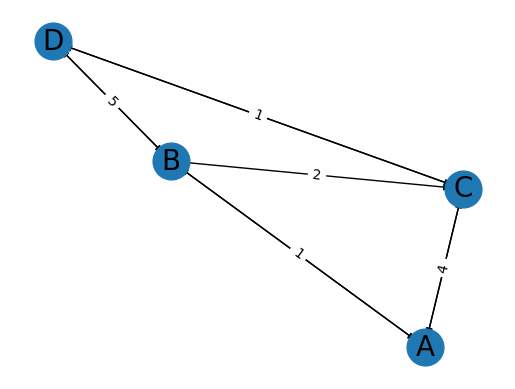

In [63]:
G = nx.DiGraph()

G.add_edge('A', 'B', weight=1)
G.add_edge('A', 'C', weight=4)
G.add_edge('B', 'C', weight=2)
G.add_edge('B', 'D', weight=5)
G.add_edge('C', 'D', weight=1)
G.add_edge('B', 'A', weight=1)  
G.add_edge('C', 'A', weight=4)  
G.add_edge('D', 'B', weight=5)  
G.add_edge('D', 'C', weight=1)  

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.axis('off')  
plt.show()  